In [43]:
import sys

sys.path.append("../")

In [44]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
import os

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# import data.drawings.make_tasks as drawing_tasks
from src.analysis_utilities import SynthesisExperimentAnalyzer
from src.config_builder import ExperimentType

In [46]:
sns.set_theme(style="whitegrid", font_scale=1.25, rc={'figure.figsize':(12, 8)})

In [47]:
%config InlineBackend.figure_format = 'retina'

In [48]:
EXPERIMENT_NAME = "runs_re2"
DOMAIN = "re2"

# EXPERIMENT_NAME = "runs_clevr"
# DOMAIN = "clevr"

# EXPERIMENT_NAME = "runs_logo"
# DOMAIN = "logo"

COMPUTE_LIKELIHOODS = True

FIGURES_DIR = os.path.join("figures", EXPERIMENT_NAME)
FIGURES_DOMAIN_DIR = os.path.join("figures", EXPERIMENT_NAME, DOMAIN)
os.makedirs(FIGURES_DOMAIN_DIR, exist_ok=True)

In [49]:
analyzer = SynthesisExperimentAnalyzer(
    experiment_name=EXPERIMENT_NAME,
    experiment_types=["baseline_dreamcoder", "gpt_generation", "gpt_solver", "gpt_solver_stitch", "gpt_solver_stitch_namer", "gpt_3_5_turbo"],
    allow_incomplete_results=True,
    compute_likelihoods=COMPUTE_LIKELIHOODS,
    batch_size = 96,
    seeds = [111, 222, 333],
)

Experiment directory: ../experiments_iterative/outputs/runs_re2
Available domains: ['re2']


## Runtime metrics

In [50]:
df_runtime = analyzer.get_runtime_metrics()
df_runtime

Not found: ../experiments_iterative/outputs/runs_re2/domains/re2/baseline_dreamcoder/seed_111/baseline_dreamcoder_96/0/metrics.json
Not found: ../experiments_iterative/outputs/runs_re2/domains/re2/baseline_dreamcoder/seed_111/baseline_dreamcoder_96/1/metrics.json
Not found: ../experiments_iterative/outputs/runs_re2/domains/re2/baseline_dreamcoder/seed_111/baseline_dreamcoder_96/2/metrics.json
Not found: ../experiments_iterative/outputs/runs_re2/domains/re2/baseline_dreamcoder/seed_111/baseline_dreamcoder_96/3/metrics.json
Not found: ../experiments_iterative/outputs/runs_re2/domains/re2/baseline_dreamcoder/seed_111/baseline_dreamcoder_96/4/metrics.json
Not found: ../experiments_iterative/outputs/runs_re2/domains/re2/baseline_dreamcoder/seed_111/baseline_dreamcoder_96/5/metrics.json
Not found: ../experiments_iterative/outputs/runs_re2/domains/re2/baseline_dreamcoder/seed_111/baseline_dreamcoder_96/6/metrics.json
Not found: ../experiments_iterative/outputs/runs_re2/domains/re2/baseline_dr

,curr_iteration,model_type,model_fn,task_split,time_start,time_end,time_elapsed,domain,experiment_type,seed,iteration
0,0,llm_solver,infer_programs_for_tasks,train,2023-04-20 21:38:40.031117056+00:00,2023-04-20 21:46:57.391825664+00:00,497.360709,re2,gpt_3_5_turbo,111,0
1,0,llm_solver,infer_programs_for_tasks,test,2023-04-20 21:46:57.392141568+00:00,2023-04-20 23:05:11.304383232+00:00,4693.912242,re2,gpt_3_5_turbo,111,0
2,1,llm_solver,infer_programs_for_tasks,train,2023-04-20 23:05:12.338389504+00:00,2023-04-20 23:16:50.723599616+00:00,698.385210,re2,gpt_3_5_turbo,111,1
3,2,llm_solver,infer_programs_for_tasks,train,2023-04-20 23:16:51.594666240+00:00,2023-04-20 23:32:31.374000128+00:00,939.779334,re2,gpt_3_5_turbo,111,2
4,3,llm_solver,infer_programs_for_tasks,train,2023-04-20 23:32:32.123044352+00:00,2023-04-20 23:48:05.798860288+00:00,933.675816,re2,gpt_3_5_turbo,111,3
5,0,llm_solver,infer_programs_for_tasks,train,2023-04-19 18:17:51.315987712+00:00,2023-04-19 18:17:51.945095936+00:00,0.629108,re2,gpt_solver,111,0
6,0,llm_solver,infer_programs_for_tasks,test,2023-04-19 18:17:51.945491200+00:00,2023-04-19 19:28:48.410732544+00:00,4256.465241,re2,gpt_solver,111,0
7,1,llm_solver,infer_programs_for_tasks,train,2023-04-18 20:35:14.407078656+00:00,2023-04-18 20:47:25.225926144+00:00,730.818847,re2,gpt_solver,111,1
8,2,llm_solver,infer_programs_for_tasks,train,2023-04-18 20:47:26.156069888+00:00,2023-04-18 21:05:30.218518528+00:00,1084.062449,re2,gpt_solver,111,2
9,3,llm_solver,infer_programs_for_tasks,train,2023-04-18 21:05:31.159703552+00:00,2023-04-18 21:24:54.051788544+00:00,1162.892085,re2,gpt_solver,111,3


In [57]:
df_runtime.groupby(["domain", "experiment_type", "seed", "model_type", "model_fn", "task_split", "iteration"]).time_elapsed.agg("mean")

domain  experiment_type          seed  model_type     model_fn                  task_split  iteration
re2     gpt_3_5_turbo            111   llm_solver     infer_programs_for_tasks  test        0            4693.912242
                                                                                train       0             497.360709
                                                                                            1             698.385210
                                                                                            2             939.779334
                                                                                            3             933.675816
        gpt_solver               111   llm_solver     infer_programs_for_tasks  test        0            4256.465241
                                                                                            3            6118.313065
                                                                               

# Analysis 1: Tasks solved over time

### Tasks solved vs. LAPS iteration

In [52]:
df = analyzer.get_synthesis_results_for_domain(
    DOMAIN,
)

df

,request,task,programs,best_search_time,split,solved,seed,iteration,experiment_type
0,"{'constructor': '->', 'arguments': [{'construc...",re2_train_0_if_the_word_ends_with_any_letter_a...,[],NaN,train,False,111,0,baseline_dreamcoder
1,"{'constructor': '->', 'arguments': [{'construc...",re2_train_1_if_there_is_consonant_replace_that...,[],NaN,train,False,111,0,baseline_dreamcoder
2,"{'constructor': '->', 'arguments': [{'construc...",re2_train_2_if_the_word_ends_with_consonant_s_...,[],NaN,train,False,111,0,baseline_dreamcoder
3,"{'constructor': '->', 'arguments': [{'construc...",re2_train_3_if_there_is_d_replace_that_with_y,[],NaN,train,False,111,0,baseline_dreamcoder
4,"{'constructor': '->', 'arguments': [{'construc...",re2_train_4_if_there_is_b_add_k_before_that,[],NaN,train,False,111,0,baseline_dreamcoder
...,...,...,...,...,...,...,...,...,...
64158,"{'constructor': '->', 'arguments': [{'construc...",re2_test_495_if_there_is_vowel_n_replace_that_...,[],NaN,test,False,111,9,gpt_solver_stitch_namer
64159,"{'constructor': '->', 'arguments': [{'construc...",re2_test_496_if_the_word_ends_with_any_letter_...,[{'program': '(lambda (#(lambda (lambda (lambd...,21.541273,test,True,111,9,gpt_solver_stitch_namer
64160,"{'constructor': '->', 'arguments': [{'construc...",re2_test_497_if_the_word_starts_with_any_lette...,[{'program': '(lambda (#(lambda (lambda (lambd...,NaN,test,True,111,9,gpt_solver_stitch_namer
64161,"{'constructor': '->', 'arguments': [{'construc...",re2_test_498_if_there_is_vowel_r_add_u_before_...,[],NaN,test,False,111,9,gpt_solver_stitch_namer


In [53]:
df_results = (
    df[df.programs.astype(bool)]
    .groupby(["experiment_type", "seed", "iteration", "split"])
    .task.count()
    .reset_index(name="n_solved")
)

df_results

,experiment_type,seed,iteration,split,n_solved
0,baseline_dreamcoder,111,0,test,78
1,baseline_dreamcoder,111,0,train,16
2,baseline_dreamcoder,111,1,train,32
3,baseline_dreamcoder,111,2,train,61
4,baseline_dreamcoder,111,3,test,209
...,...,...,...,...,...
124,gpt_solver_stitch_namer,111,6,train,192
125,gpt_solver_stitch_namer,111,7,train,202
126,gpt_solver_stitch_namer,111,8,train,215
127,gpt_solver_stitch_namer,111,9,test,269


Text(0.5, 1.0, 're2')

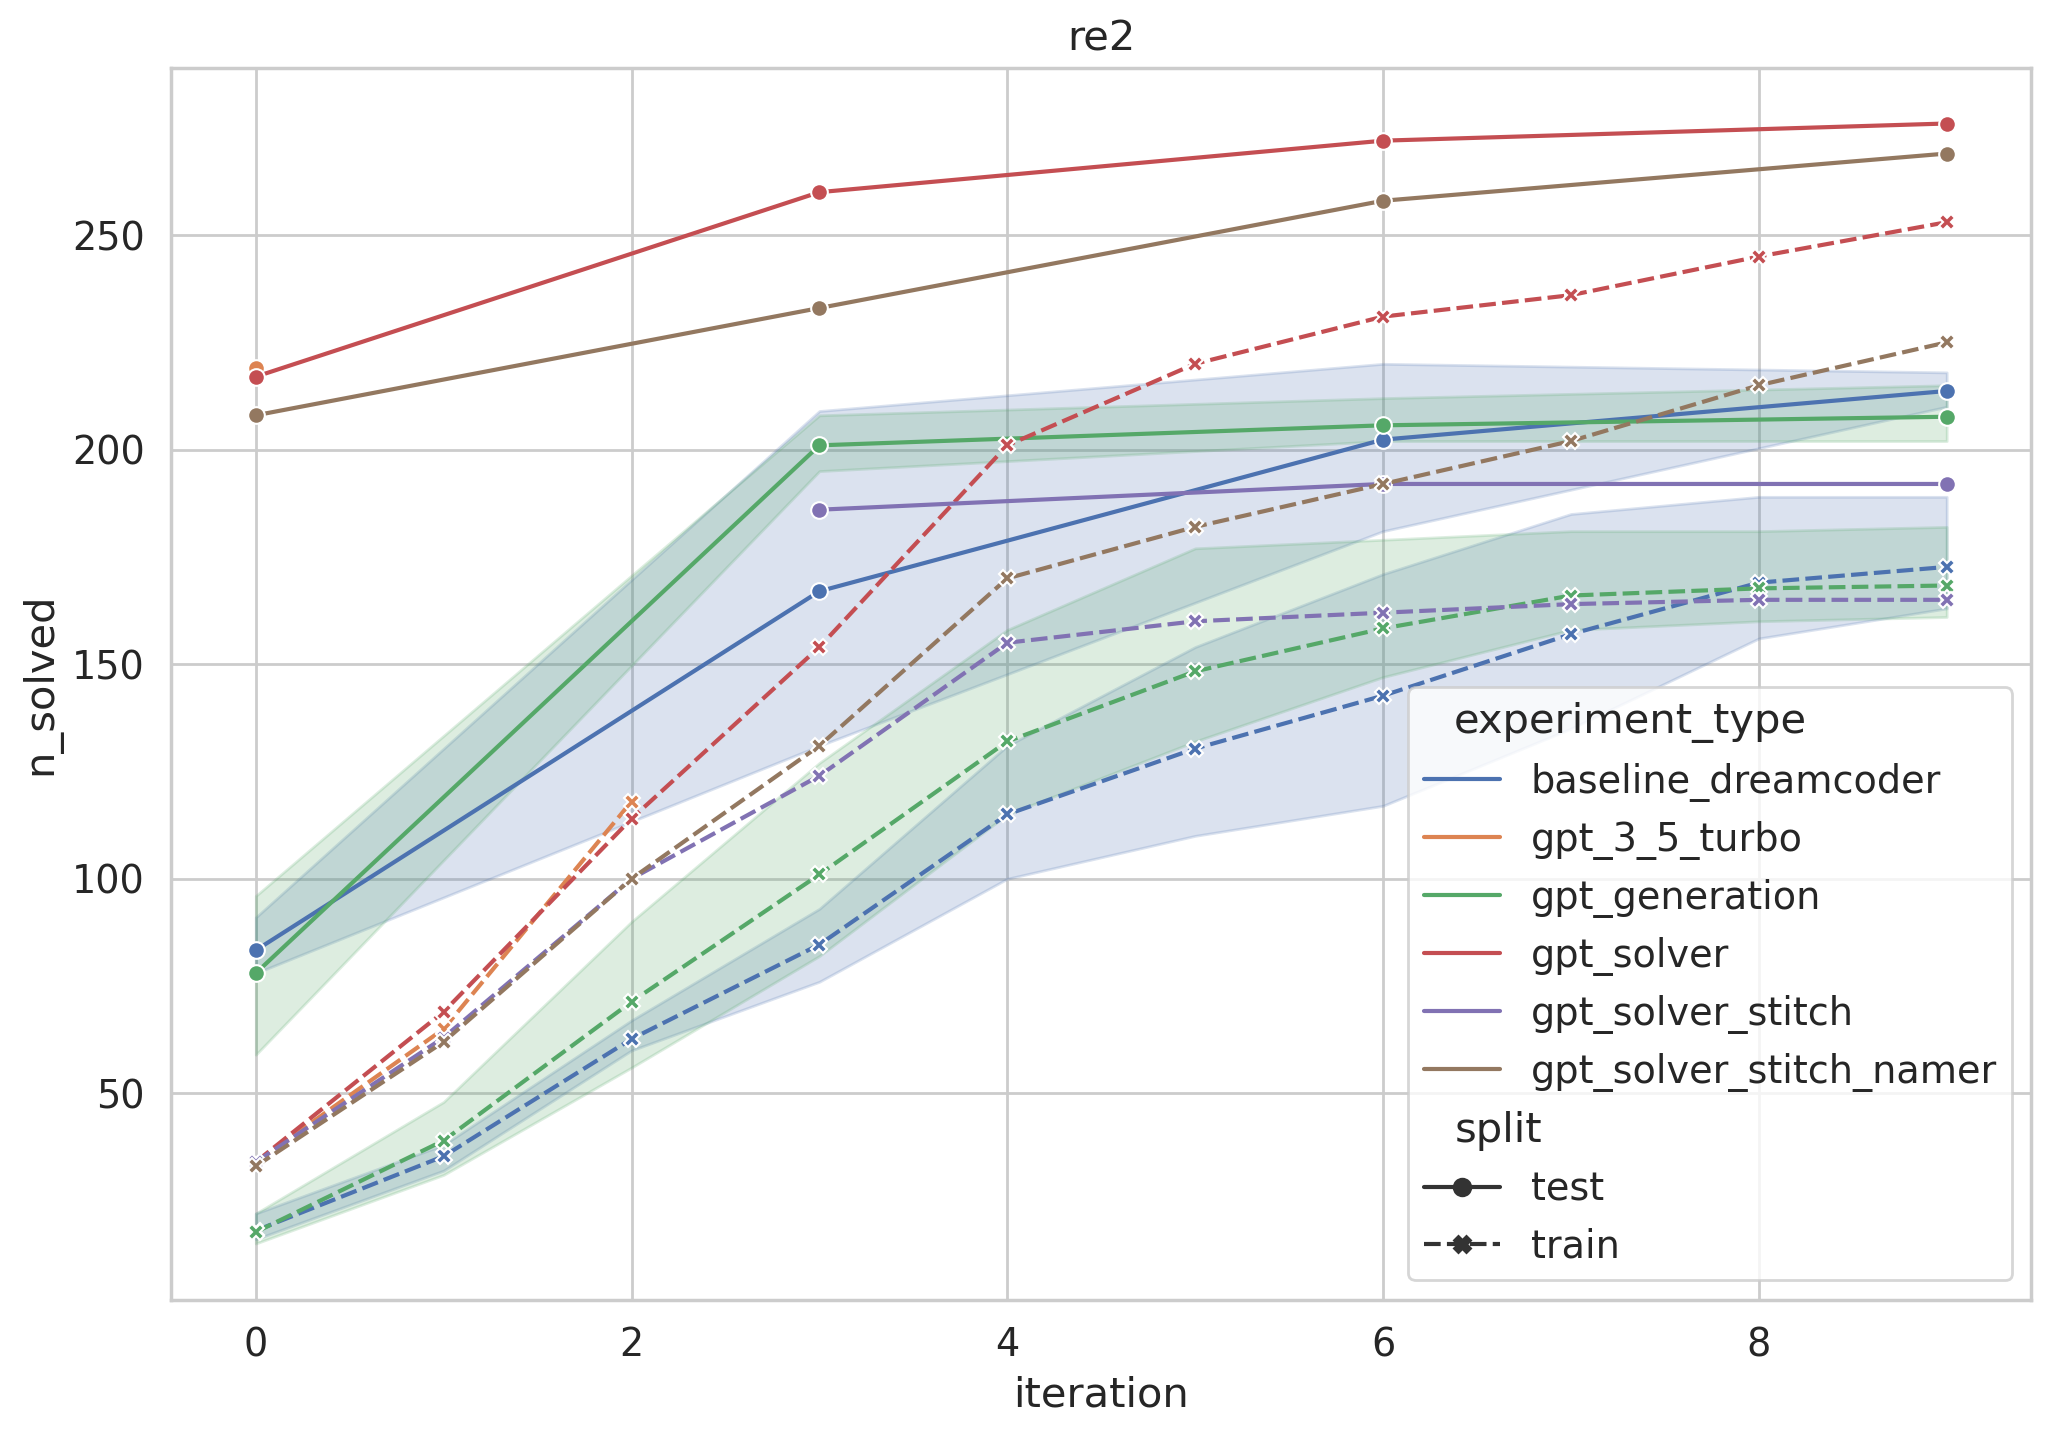

In [54]:
sns.lineplot(
    data=df_results, 
    x="iteration", 
    y="n_solved", 
    hue="experiment_type",
    style="split",
    markers=True,
)
plt.title(f"{DOMAIN}")

Text(0.5, 0.98, 're2')

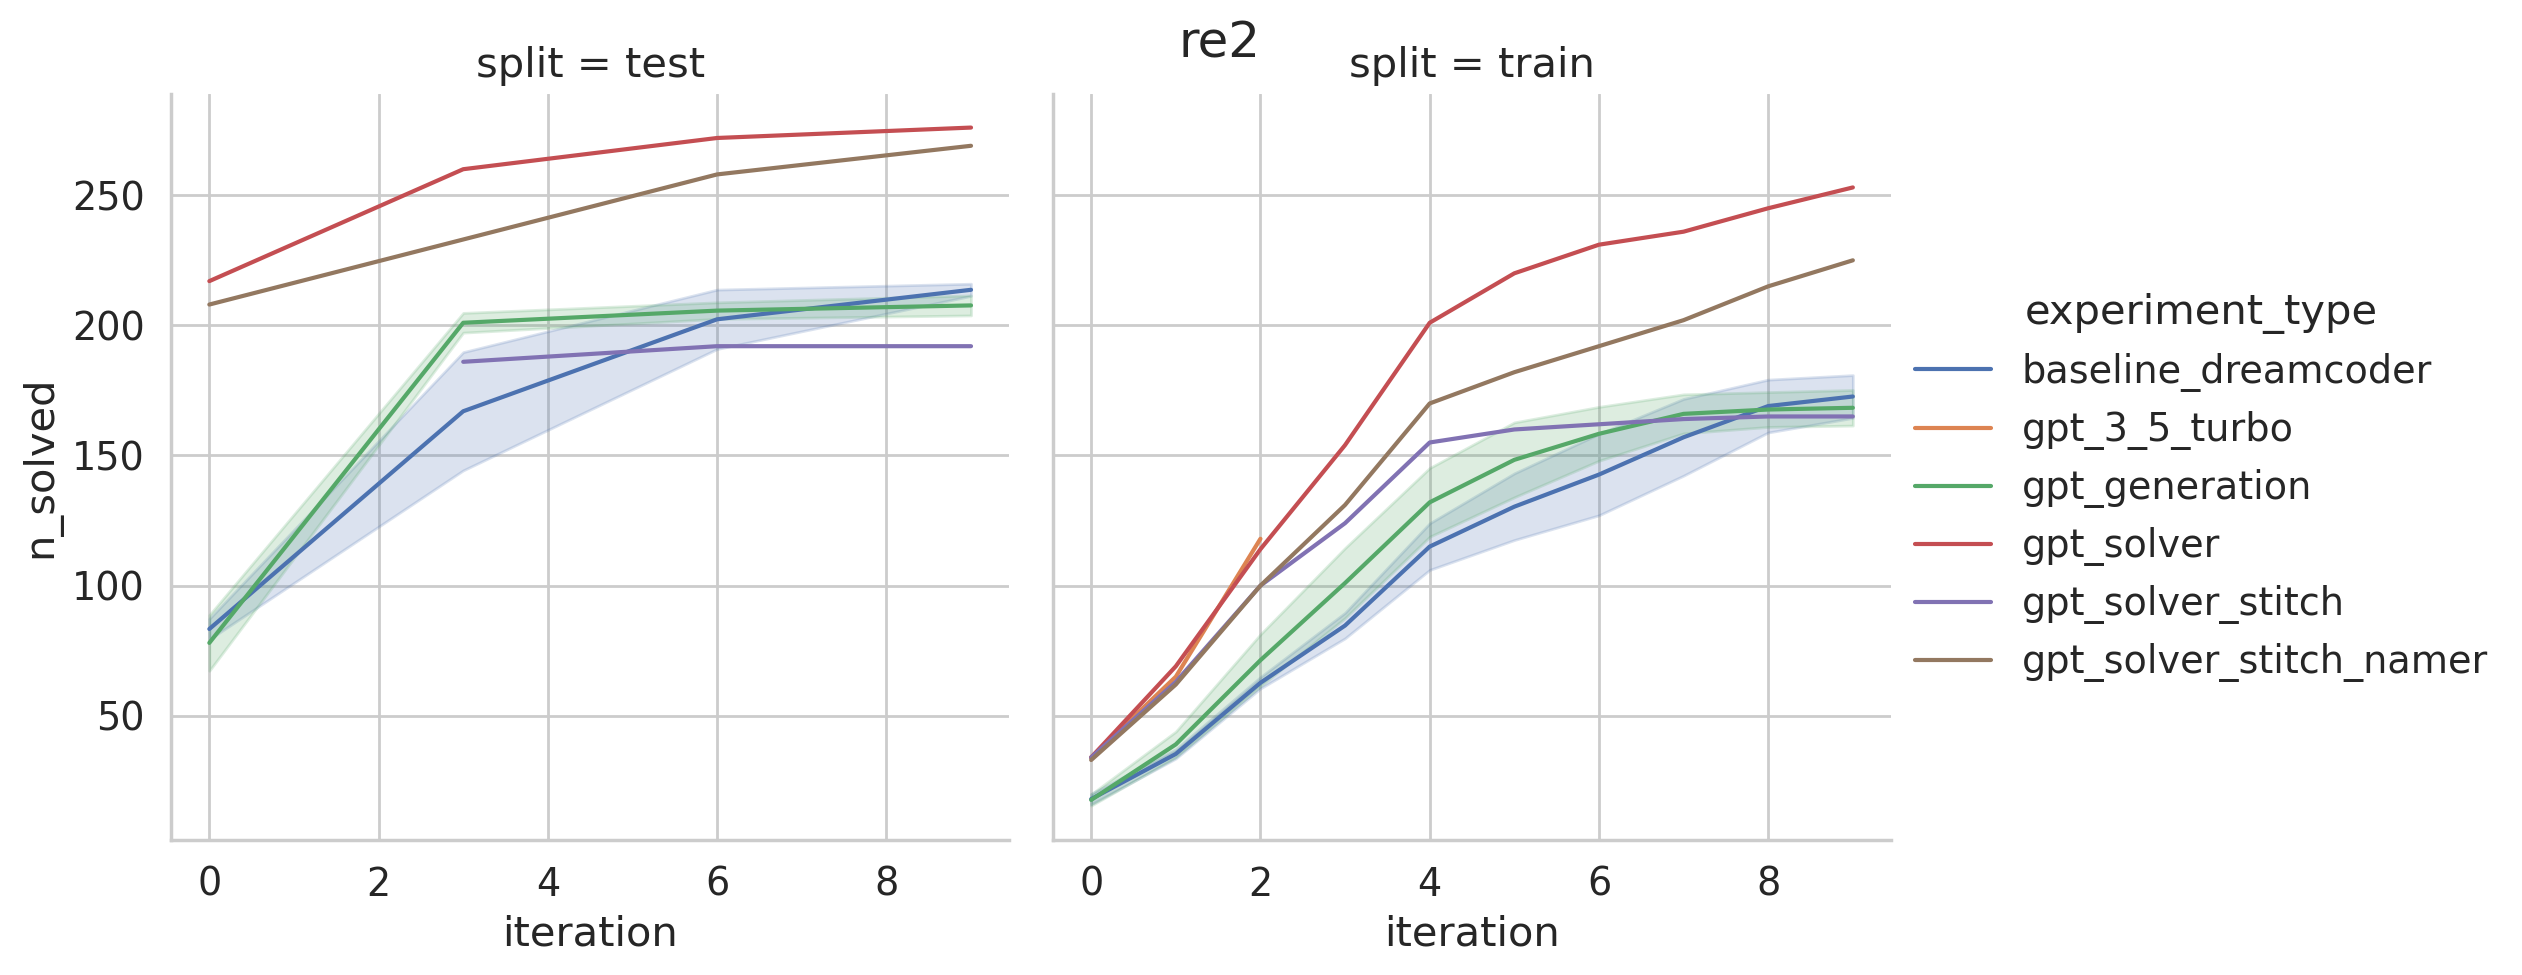

In [55]:
sns.relplot(
    data=df_results,
    kind="line",
    col="split",
    x="iteration", 
    y="n_solved", 
    hue="experiment_type",
    # style="seed",
    markers=True,
    errorbar="se"
)
plt.suptitle(f"{DOMAIN}")

### Tasks solved vs. search time

In [56]:
df_search_time = analyzer.get_search_time_results_for_domain(DOMAIN)
df_search_time

ValueError: Enumeration timeouts are inconsistent across conditions: [1000, 1000, 1000, None, 1000, 1000, 1000, None, None, None]

In [ ]:
g = sns.lineplot(
    data=df_search_time[df_search_time.split == "train"],
    x="time",
    y="n_solved",
    # hue="seed",
    hue="iteration",
    size="iteration",
    legend="full",
    errorbar="se",
)
g.set(xscale='symlog')
plt.title(f"{DOMAIN} (train)")

In [ ]:
g = sns.relplot(
    data=df_search_time[df_search_time.split == "train"],
    col="experiment_type",
    x="time",
    y="n_solved",
    hue="iteration",
    size="iteration",
    legend="full",
    kind="line",
    errorbar="se",
)
g.set(xscale='symlog')
plt.suptitle(f"{DOMAIN} (train)")

In [ ]:
g = sns.lineplot(
    data=df_search_time[df_search_time.split == "test"],
    x="time",
    y="n_solved",
    # hue="seed",
    hue="iteration",
    size="iteration",
    legend="full",
    errorbar="se",
)
g.set(xscale='symlog')
plt.title(f"{DOMAIN} (test)")

In [ ]:
g = sns.relplot(
    data=df_search_time[df_search_time.split == "test"],
    col="experiment_type",
    x="time",
    y="n_solved",
    hue="iteration",
    size="iteration",
    legend="full",
    kind="line",
    errorbar="se",
)
g.set(xscale='symlog')
plt.suptitle(f"{DOMAIN} (test)")

# Analysis 2: Library abstractions

In [ ]:
df_abstractions = analyzer.get_abstractions_for_domain(DOMAIN)
df_abstractions.to_csv(f"{DOMAIN}_abstractions.csv", index=False)
df_abstractions

In [ ]:
ax = sns.relplot(data=df_abstractions.query("random_seed == 111").sort_values(by=["dreamcoder"], key=lambda x: x.str.len()), kind="line", col="experiment_type", y="dreamcoder", x="iteration", hue="name", size="name")
ax.set(yticklabels=[])
plt.show()

In [ ]:
with pd.option_context('display.max_colwidth', None, 'display.max_rows', None):
    display(df_abstractions.sort_values(["experiment_type", "random_seed", "name", "iteration"])[["experiment_type", "random_seed", "name", "iteration", "arity", "compression_ratio", "dreamcoder"]])

In [ ]:
sns.lineplot(data=df_abstractions, x="name", y="compression_ratio", size="iteration")

In [ ]:
sns.lineplot(data=df_abstractions, x="name", y="cumulative_compression_ratio", size="iteration", hue="iteration")
plt.title(f"{DOMAIN} compressivity of library")

In [ ]:
sns.relplot(data=df_abstractions, kind="line", errorbar="se", col="experiment_type", x="name", y="cumulative_compression_ratio", size="iteration", hue="iteration")
plt.suptitle(f"{DOMAIN} compressivity of library")

# Analysis 3: Solved programs

In [ ]:
df = analyzer.get_synthesis_results_for_domain(DOMAIN)
df.to_csv(f"{DOMAIN}_search_results.csv")

# re2-specific analysis

In [ ]:
import re

def atoi(text):
    return int(text) if text.isdigit() else text

def task_order(keys):
    return [int(re.split(r'(\d+)', k[len("re2_test_"):])[1]) for k in keys]

def alpha_order(keys):
    return [re.split(r'(\d+)', k[len("re2_test_"):])[-1] for k in keys]

In [ ]:
ITERATION = 6
SEED = 111

df_solved = df.copy()
df_solved = df_solved.query("split == 'test'").query(f"iteration == {ITERATION}").query(f"seed == {SEED}")
df_solved = df_solved[["task", "experiment_type", "solved"]]
df_solved.groupby("experiment_type").sum()

In [ ]:
df_solved

In [ ]:
df_solved_sorted = df_solved[["task", "experiment_type", "solved"]].pivot(index="task", columns=["experiment_type"])
df_solved_sorted = df_solved_sorted.sort_values(by="task", key=task_order)

In [ ]:
def set_color(val):
    return f"color: {'green' if val else 'red'}"

with pd.option_context('display.max_rows', None, 'display.max_colwidth', None):
    df_display = df_solved_sorted.reset_index(level=0)
    df_display = df_display.style.set_properties(**{'text-align': 'left'}).applymap(set_color)
    display(df_display)

In [ ]:
df_vowel = df[df.task.str.contains("vowel")]
df_vowel = df_vowel.query("experiment_type == 'gpt_solver'").query(f"seed == {SEED}").query(f"iteration == {ITERATION}").query("solved")
df_vowel = df_vowel.sort_values(by="task", key=task_order)

In [ ]:
df_vowel.groupby("split").task.nunique()

In [ ]:
for _, row in df_vowel.iterrows():
    print(row.task)
    for p_data in row.programs:
        print(p_data["program"])
    print()